# Pymaceuticals
* Tumor Size Response: Among all treatment groups, only two drugs showed efficacy in reducing the volume of tumors in mice: Capomulin and Ramicane. Remarkably, they had almost identical responses, which may suggest the molecules are either related structurally/functionally or this is a idiosyncracy of the tumor model.

* Metastastic Response: Among all treatments and placebo, the tumor model shows metastasis over the course of treatment. This suggests that whatever cancer the model is emulating is prone to metastasis and therefore a promising new treatment would be one that suppresses metastasis while arresting or reducing tumor volume. As with tumor size response, Capomulin and Ramicane were the only two drugs that showed a slowing of metastatic spread over the course of treatment when compared to placebo. Interestingly, many drugs that showed no efficacy for tumor size control showed varying degrees of efficacy for reducing metastasis.

* Survival Rate: Survival rate can be used as a good assessment of toxicity and used to screen compound with similar efficacy in early models. Again, Capomulin and Ramicane both show the highest survival rates of mice (80% and 83%, respectively). This suggests that in addition to their efficacy in treatment, they also will have advantageous toxicity profiles. Clearly Pymaceuticals should move ahead with only these two compounds. An interesting note is that some compounds that showed efficacy in suppressing metastasis (e.g. Propriva)showed markedly worse survival rates than the untreated group despite controlling tumor growth. This suggests these compounds may be causing mortality via their own toxicity and they should be removed from future trials.

## Import dependencies and specify filepaths
* Files will be local to avoid needing to use relative filepaths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
clinicaldf = pd.read_csv('clinicaltrial_data.csv')
mousedf = pd.read_csv('mouse_drug_data.csv')

## Tumor Size Response to Drug Treatment

Text(0,0.5,'Tumor Size (mm^3)')

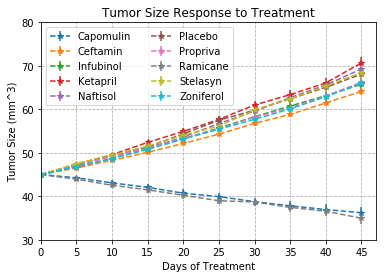

In [2]:
datadf = clinicaldf.merge(mousedf,on=['Mouse ID'],how='inner')
#Use groupby to groupby drug and timepoint
datadf_groupby = datadf.groupby(['Drug','Timepoint'])
#Use the mean method on the Drug/Timepoint groupby to average tumor size across all mice
groupby_meantumor = datadf_groupby['Tumor Volume (mm3)'].mean()
groupby_meantumor_sem = datadf_groupby['Tumor Volume (mm3)'].sem()
list_of_drugs = []
#Use the index.levels object to create a list of drug names
for i in groupby_meantumor.index.levels[0]:
    list_of_drugs.append(i)
#Create a new dataframe to incrementally add drug & tumor data to
meantumor = pd.DataFrame(data=groupby_meantumor.loc[list_of_drugs[0]],index=groupby_meantumor.index.levels[1])
#This is an ugly work-around to rename the column to the drug name
#NaN's result from attempting to use the column assignment in the DataFrame constructor
meantumor = meantumor.rename(columns={'Tumor Volume (mm3)':list_of_drugs[0]})
#Loop over the list of drugs to finish constructing the dataframe for plotting
for i in range(1,len(list_of_drugs)):
    meantumor = meantumor.join(groupby_meantumor[list_of_drugs[i]])
    meantumor = meantumor.rename(columns={'Tumor Volume (mm3)':list_of_drugs[i]})
#Use NumPy to extract index array values to a list for the plot's x axis
x_axis = meantumor.index.values.tolist()
#Loop over the list of drugs to add series to the errorbar plot
for i in list_of_drugs:
    plt.errorbar(x=x_axis,y=meantumor[i],yerr=groupby_meantumor_sem[i],fmt='--*')
#Format the plot for maximum readability, see comments for decision logic
#Due to number of drugs, force multiple columns but still allow pyplot to best fit
plt.legend(ncol=2)
#Set x axis limits dynamically based on time points using list indices
plt.xlim(x_axis[0],x_axis[-1]+2)
#This limit is hardcoded to save time, should be made dynamic if possible
plt.ylim(30,80)
#Enable gridlines for ease of value interpolation
plt.grid(linestyle='dashed')
#Force x ticks to be present at each member of the x_axis list
plt.xticks(x_axis)
#Set chart and axes titles
plt.title('Tumor Size Response to Treatment')
plt.xlabel('Days of Treatment')
plt.ylabel('Tumor Size (mm^3)')

## Metastatic Response to Treatment

Text(0,0.5,'Metastatic Sites')

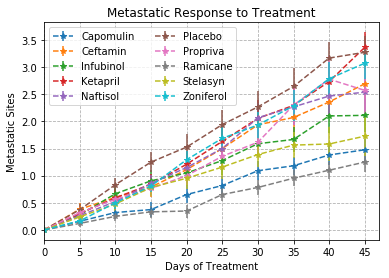

In [3]:
#We can reuse the groupby object because the dimensions are the same
groupby_metasmean = datadf_groupby['Metastatic Sites'].mean()
groupby_metassem = datadf_groupby['Metastatic Sites'].sem()
#Create a new dataframe to incrementally add drug & metastasis data to
meanmetas = pd.DataFrame(data=groupby_metasmean.loc[list_of_drugs[0]],index=groupby_metasmean.index.levels[1])
#This is an ugly work-around to rename the column to the drug name
#NaN's result from attempting to use the column assignment in the DataFrame constructor
meanmetas = meanmetas.rename(columns={'Metastatic Sites':list_of_drugs[0]})
#Loop over the list of drugs to finish constructing the dataframe for plotting
for i in range(1,len(list_of_drugs)):
    meanmetas = meanmetas.join(groupby_metasmean[list_of_drugs[i]])
    meanmetas = meanmetas.rename(columns={'Metastatic Sites':list_of_drugs[i]})
#Loop over the list of drugs to add series to the errorbar plot
for i in list_of_drugs:
    plt.errorbar(x=x_axis,y=meanmetas[i],yerr=groupby_metassem[i],fmt='--*')
#Format the plot for maximum readability, see comments for decision logic
#Due to number of drugs, force multiple columns but still allow pyplot to best fit
plt.legend(ncol=2)
#Set x axis limits dynamically based on time points using list indices
plt.xlim(x_axis[0],x_axis[-1]+2)
#Enable gridlines for ease of value interpolation
plt.grid(linestyle='dashed')
#Force x ticks to be present at each member of the x_axis list
plt.xticks(x_axis)
#Set chart and axes titles
plt.title('Metastatic Response to Treatment')
plt.xlabel('Days of Treatment')
plt.ylabel('Metastatic Sites')

## Survival Rates

### Count of Mice -- (this is not part of the assignment, do not grade)

Text(0,0.5,'Mice Alive')

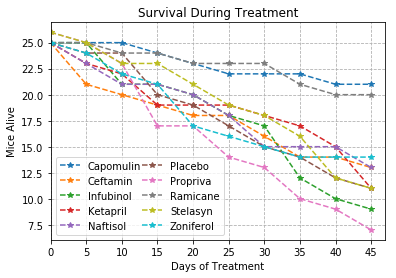

In [4]:
#Use groupby to groupby drug and timepoint
datadf_groupby = datadf.groupby(['Drug','Timepoint'])
#Use a count on 'Mouse ID' to return the number of mice at each timepoint
mouse_counts = datadf_groupby['Mouse ID'].count()
for i in list_of_drugs:
    plt.errorbar(x=x_axis,y=mouse_counts[i],fmt='--*')
#Format the plot for maximum readability, see comments for decision logic
#Due to number of drugs, force multiple columns but still allow pyplot to best fit
plt.legend(list_of_drugs,ncol=2,columnspacing=0.1)
#Set x axis limits dynamically based on time points using list indices
plt.xlim(x_axis[0],x_axis[-1]+2)
#Enable gridlines for ease of value interpolation
plt.grid(linestyle='dashed')
#Force x ticks to be present at each member of the x_axis list
plt.xticks(x_axis)
#Set chart and axes titles
plt.title('Survival During Treatment')
plt.xlabel('Days of Treatment')
plt.ylabel('Mice Alive')

### Survival Rate

In [5]:
#Start with mice_counts and convert counts to a percentage
#loop over list_of_drugs to convert counts into percentages in a new series
mouse_counts_rel = mouse_counts
for drug in list_of_drugs:
    mouse_counts_rel[drug] = (mouse_counts[drug]/mouse_counts.loc[drug][0])*100

Text(0,0.5,'% Mice Remaining')

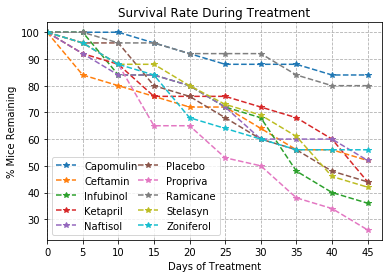

In [6]:
for i in list_of_drugs:
    plt.errorbar(x=x_axis,y=mouse_counts_rel[i],fmt='--*')
#Format the plot for maximum readability, see comments for decision logic
#Due to number of drugs, force multiple columns but still allow pyplot to best fit
plt.legend(list_of_drugs,ncol=2,columnspacing=0.1)
#Set x axis limits dynamically based on time points using list indices
plt.xlim(x_axis[0],x_axis[-1]+2)
#Enable gridlines for ease of value interpolation
plt.grid(linestyle='dashed')
#Force x ticks to be present at each member of the x_axis list
plt.xticks(x_axis)
#Set chart and axes titles
plt.title('Survival Rate During Treatment')
plt.xlabel('Days of Treatment')
plt.ylabel('% Mice Remaining')

## Summary Bar Graph

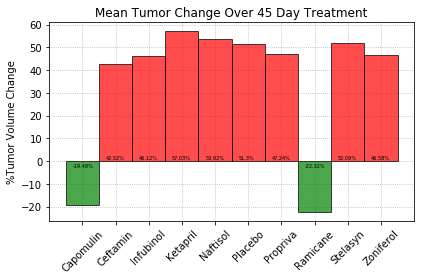

In [14]:
#Similar to converting surviving mouse counts above, use the first timepoint
# to convert all subsequent volumes to percentages of the original value
tumor_size = groupby_meantumor
#Create a relative tumor size series empty with index of drugs
tumor_size_rel = pd.Series(index=list_of_drugs)
#loop over the list_of_drugs extracting 
for drug in list_of_drugs:
    final_tumor_size = (tumor_size[drug].iloc[9])
    initial_tumor_size = (tumor_size[drug].iloc[0])
    change_in_size = final_tumor_size - initial_tumor_size
    relative_change = round((change_in_size/initial_tumor_size)*100,2)
    tumor_size_rel[drug] = relative_change
#Evaluate the data series to construct an list of color codes for bar faces
list_of_colors = []
for change in tumor_size_rel:
    if (change < 0):
        list_of_colors.append('green')
    else:
        list_of_colors.append('red')
#Assign a variable to hold the number of drugs in list_of_drugs
numdrugs = len(list_of_drugs)
x_values = np.arange(0,50*numdrugs,50)
#Use pyplot's subplots method to alter the axes independently to clean up the code
fig, ax = plt.subplots()
#Use np.arange to create an array of x values from 0 to 50*number of drugs spaced 50
# this will allow the bars to tightly touch by using a width of 50
ax.bar(x=x_values,height=tumor_size_rel,width=50,edgecolor='black',color=list_of_colors,alpha=0.7,zorder=3)
#Add title to chart and Y axis
plt.title('Mean Tumor Change Over 45 Day Treatment')
plt.ylabel('%Tumor Volume Change')
#Add tickmarks and label with drug names
plt.xticks(np.arange(0,50*numdrugs,50))
ax.set_xticklabels(list_of_drugs,rotation=45,fontsize=10)
#Add gridlines with dotted lines that exist behind the bar objects
plt.grid(linestyle='dotted',zorder=0)
#Add text to axes by iterating over the tumor_size_rel data
# accounts for y position based on % increase sign value
# I did not use white font because it has lower readability
# without black bordering
for x,drug in zip(x_values,list_of_drugs):
    if tumor_size_rel[drug] <= 0:
        ax.text(x=x-15,y=-2.5,s=(f"{tumor_size_rel[drug]}%"),fontsize=5)
    else:
        ax.text(x=x-15,y=1,s=(f"{tumor_size_rel[drug]}%"),fontsize=5)
fig.tight_layout()
#Save as a PDF output to admire and frame
plt.savefig('MikeTest.pdf')